## Multilayer Perceptron (MLP) on Digits Dataset using PyTorch

In [12]:
# 📥 1. Load Dataset
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [15]:
# Load digits dataset
digits = load_digits()
X = digits.data  # shape: (1797, 64), 8x8 images
y = digits.target  # labels: 0-9

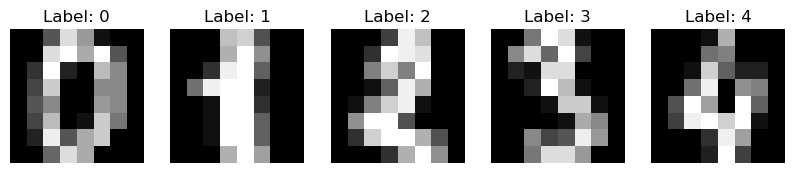

In [23]:
# Plot a few images
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis('off')
plt.show()

In [16]:
# 📊 2. Preprocess Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [17]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

In [18]:
# 🧠 3. Define MLP Model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(64, 100),
            nn.ReLU(),
            nn.Linear(100, 10)  # 10 output classes
        )

    def forward(self, x):
        return self.model(x)

In [19]:
model = MLP()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [20]:
# 🏋️‍♂️ 4. Train the Model
for epoch in range(20):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = loss_fn(outputs, y_train)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1:2d}, Loss: {loss.item():.4f}")

Epoch  1, Loss: 2.3227
Epoch  2, Loss: 1.9582
Epoch  3, Loss: 1.6319
Epoch  4, Loss: 1.3288
Epoch  5, Loss: 1.0558
Epoch  6, Loss: 0.8257
Epoch  7, Loss: 0.6435
Epoch  8, Loss: 0.5059
Epoch  9, Loss: 0.4050
Epoch 10, Loss: 0.3318
Epoch 11, Loss: 0.2785
Epoch 12, Loss: 0.2388
Epoch 13, Loss: 0.2072
Epoch 14, Loss: 0.1806
Epoch 15, Loss: 0.1578
Epoch 16, Loss: 0.1385
Epoch 17, Loss: 0.1224
Epoch 18, Loss: 0.1089
Epoch 19, Loss: 0.0973
Epoch 20, Loss: 0.0871


In [21]:
# 📈 5. Evaluate the Model
with torch.no_grad():
    preds = model(X_test).argmax(dim=1)
    accuracy = (preds == y_test).float().mean()
    print(f"\nTest Accuracy: {accuracy.item()*100:.2f}%")


Test Accuracy: 95.83%


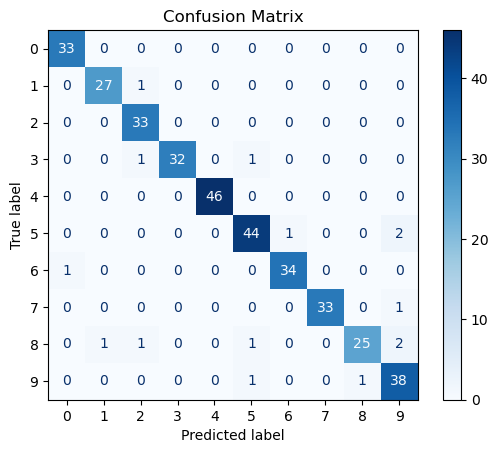

In [22]:
# 📉 6. Confusion Matrix
cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
